# Overview

This is a multi-lableling classification of text and not multiclass classification. Multiclass classification makes the assumption that each sample is assigned to one and only one label out of many labels. Multilabel classification assigns to each sample a set of target labels. A text might be about any of religion, politics, finance or education at the same time or none of these.

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline

# Preprocessing

In [297]:
train_pre = pd.read_csv('Data/Devex_train.csv',encoding='latin-1')
train_pre.head()

,Unique ID,Type,Text,Label 1,Label 2,Label 3,Label 4,Label 5,Label 6,Label 7,Label 8,Label 9,Label 10,Label 11,Label 12
0,12555,Grant,Centers of Biomedical Research Excellence (COB...,3.b.2 - Total net official development assista...,3.c.1 - Health worker density and distribution,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14108,Grant,Research on Regenerative Medicine <h2><strong>...,3.b.2 - Total net official development assista...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,23168,Organization,Catholic Health Association of India (CHAI): <...,3.d.1 - International Health Regulations (IHR)...,3.8.1 - Coverage of essential health services ...,3.8.2 - Proportion of population with large ho...,3.b.3 - Proportion of health facilities that h...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,219512,Contract,Quality Improvement Initiatives for Diabetes,3.4.1 - Mortality rate attributed to cardiovas...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,274093,Tender,Provision of Thalassemia Drugs and Disposables...,3.3.5 - Number of people requiring interventio...,3.4.1 - Mortality rate attributed to cardiovas...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Devex_test_questions
test = pd.read_csv('Data/Devex_test_questions.csv',encoding='latin-1')
test.head()

,Unique ID,Type,Text
0,49848,Organization,4th Sector Health: <p>4th Sector Health is a U...
1,52348,Organization,Action for Global Health: <p>Action for Global...
2,103541,Organization,Scottish Association for Mental Health (SAMH):...
3,52382,Organization,Singapore Immunology Network: <p>The Singapore...
4,47212,Organization,Coastal Conservation and Education Foundation ...


In [4]:
#train.dropna(inplace=True)

In [5]:
df = train.copy()
df.head()

,Unique ID,Type,Text,Label 1,Label 2,Label 3,Label 4,Label 5,Label 6,Label 7,Label 8,Label 9,Label 10,Label 11,Label 12
0,12555,Grant,Centers of Biomedical Research Excellence (COB...,3.b.2 - Total net official development assista...,3.c.1 - Health worker density and distribution,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14108,Grant,Research on Regenerative Medicine <h2><strong>...,3.b.2 - Total net official development assista...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,23168,Organization,Catholic Health Association of India (CHAI): <...,3.d.1 - International Health Regulations (IHR)...,3.8.1 - Coverage of essential health services ...,3.8.2 - Proportion of population with large ho...,3.b.3 - Proportion of health facilities that h...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,219512,Contract,Quality Improvement Initiatives for Diabetes,3.4.1 - Mortality rate attributed to cardiovas...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,274093,Tender,Provision of Thalassemia Drugs and Disposables...,3.3.5 - Number of people requiring interventio...,3.4.1 - Mortality rate attributed to cardiovas...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
onehot = df[['Label 1', 'Label 2', 'Label 3',\
    'Label 4', 'Label 5', 'Label 6',\
    'Label 7','Label 8', 'Label 9', \
    'Label 10', 'Label 11', 'Label 12']].applymap(str).applymap(lambda x: x.split('-')[0].strip())
#df.head()

In [153]:
onehot.drop('combine',axis =1,inplace=True)
onehot.head()

,Label 1,Label 2,Label 3,Label 4,Label 5,Label 6,Label 7,Label 8,Label 9,Label 10,Label 11,Label 12
0,3.b.2,3.c.1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,3.b.2,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,3.d.1,3.8.1,3.8.2,3.b.3,nan,nan,nan,nan,nan,nan,nan,nan
3,3.4.1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,3.3.5,3.4.1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


# Basic Exploratory Data Analysis

In [167]:
def to_frequency_table(data):
    frequencytable = {}
    for key in data:
        #print(key)
        for element in data[key]:
            if element in frequencytable:
                #print("Hello")
                #print(key)
                frequencytable[element] += 1
            else:
                frequencytable[element] = 1
    return frequencytable
#D = to_frequency_table(onehot)
del D['nan']
D

{'3.b.2': 1044,
 '3.d.1': 217,
 '3.4.1': 485,
 '3.3.5': 156,
 '3.7.1': 189,
 '3.b.3': 397,
 '3.3.2': 174,
 '3.9.2': 218,
 '3.c.1': 232,
 '3.8.1': 531,
 '3.3.1': 372,
 '3.2.2': 138,
 '3.2.1': 249,
 '3.9.3': 63,
 '3.5.2': 68,
 '3.3.3': 158,
 '3.4.2': 61,
 '3.b.1': 185,
 '3.a.1': 76,
 '3.9.1': 55,
 '3.3.4': 53,
 '3.1.1': 218,
 '3.5.1': 123,
 '3.8.2': 161,
 '3.1.2': 97,
 '3.6.1': 33,
 '3.7.2': 165,
 'nan': 30022}

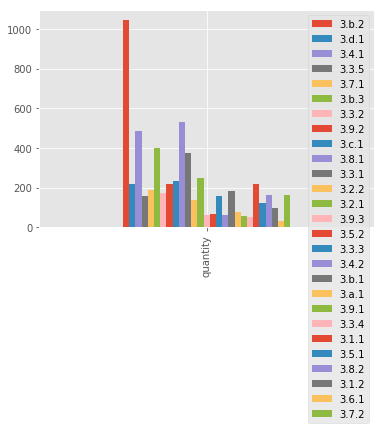

In [173]:
pd.DataFrame(D, index=['quantity']).value_counts().plot(kind='bar')

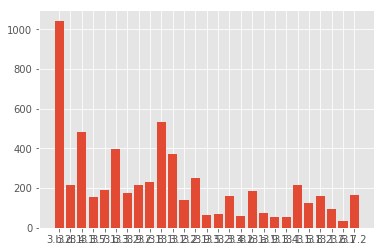

In [183]:

import matplotlib.pyplot as plt
plt.bar(range(len(D)), D.values(), align='center')
plt.xticks(range(len(D)), list(D.keys()))
plt.plot()
plt.show()

 The graph above illustrates the imbalance in the labels 

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
def hot_encode_free_text(df,col_list):
    """
        hot encode several columns of free text and handle the overlapping
        words from different columns within a pandas data frame
    """
        
    df['combine'] = df[col_list].apply(lambda x: ' '.join(x), axis=1)
    #cv = CountVectorizer(vocabulary=vocab,ngram_range=(1, 2))#token_pattern=r'(?u)\b\w+\b
    #cv = CountVectorizer(token_pattern=r'(?u)\b\w+\b')#\b[^\d\W]+\b
    cv = CountVectorizer(tokenizer=my_tokenizer)
    X_train = cv.fit_transform(df['combine'])
    X_train = pd.DataFrame(X_train.toarray(), columns=cv.get_feature_names())
    return X_train.applymap(convert_num)
    #return X_train
def convert_num(num):
    if num == 0:
        return 0
    else:
        return 1

In [8]:
#!pip install spacy

In [9]:
#!python -m spacy download en

In [10]:
#\b[^\d\W]+\b
import spacy
#from html import unescape

# create a spaCy tokenizer
spacy.load('en')
lemmatizer = spacy.lang.en.English()
def my_tokenizer(doc):
    tokens = lemmatizer(doc)
    return([token.lemma_ for token in tokens])
#my_tokenizer(vocab[0])

In [11]:
vocab = ['3.1.1','3.1.2',
 '3.2.1','3.2.2','3.3.1',
'3.3.2','3.3.3','3.3.4',
'3.3.5','3.4.1','3.4.2',
'3.5.1','3.5.2','3.6.1',
'3.7.1','3.7.2','3.8.1',
'3.8.2','3.9.1','3.9.2',
'3.9.3','3.a.1','3.b.1',
'3.b.2','3.b.3','3.c.1',
 '3.d.1']

In [12]:
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

In [13]:
hot_encoded_labels = hot_encode_free_text(onehot, onehot.columns.tolist())

In [14]:
combined_data = pd.merge(train[['Unique ID', 'Type', 'Text']], hot_encoded_labels,\
                         left_on=train[['Unique ID', 'Type', 'Text']].index,\
                         right_on=hot_encoded_labels.index, how ='inner')
combined_data.drop(['nan','key_0'],axis =1, inplace=True)
combined_data.tail()

,key_0,Unique ID,Type,Text,3.1.1,3.1.2,3.2.1,3.2.2,3.3.1,3.3.2,3.3.3,3.3.4,3.3.5,3.4.1,3.4.2,3.5.1,3.5.2,3.6.1,3.7.1,3.7.2,3.8.1,3.8.2,3.9.1,3.9.2,3.9.3,3.a.1,3.b.1,3.b.2,3.b.3,3.c.1,3.d.1
2990,2990,92153,News,How rats could help reduce the global TB burden:,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2991,2991,1209,Open Opp,Exploratory Analyses of Adherence Strategies a...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2992,2992,14342,Grant,Study on Vaccines for Diarrhoeal Diseases or L...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
2993,2993,12353,Grant,Regional Engagement Stimulation Fund on Human ...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2994,2994,260848,Tender,Graphic Design Services Consultancy ; ; <p><st...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


The Target labels are in a format(one hot encoded) that the machine learning algorithms could easily understand

# NLP

Before we can use our deep net we need to clean the text by Removing HTML tags, Removing punctuation and making all text lowercase.

In [50]:
import re

#Without removing stop words

def clean_text_final(text):
    """
    Applies some pre-processing on the given text.

    Steps :
    - Removing HTML tags
    - Removing punctuation
    - Lowering text
    """
    
    # remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    # remove the characters [\], ['] and ["]
    text = re.sub(r"\\", "", text)    
    text = re.sub(r"\'", "", text)    
    text = re.sub(r"\"", "", text)    
    
    # convert text to lowercase
    text = text.strip().lower()
    
    # replace punctuation characters with spaces
    filters='!"\'#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'
    translate_dict = dict((c, " ") for c in filters)
    translate_map = str.maketrans(translate_dict)
    text = text.translate(translate_map)

    return text

In [51]:
#FINAL TEXT Preprocessing
combined_data['Cleaned Text'] = combined_data['Text'].apply(clean_text_final)
test['Cleaned Text'] = test['Text'].apply(clean_text_final)

In [218]:
#strip_tags(train['new Text'][0])
combined_data.head()

,key_0,Unique ID,Type,Text,3.1.1,3.1.2,3.2.1,3.2.2,3.3.1,3.3.2,3.3.3,3.3.4,3.3.5,3.4.1,3.4.2,3.5.1,3.5.2,3.6.1,3.7.1,3.7.2,3.8.1,3.8.2,3.9.1,3.9.2,3.9.3,3.a.1,3.b.1,3.b.2,3.b.3,3.c.1,3.d.1,Cleaned Text
0,0,12555,Grant,Centers of Biomedical Research Excellence (COB...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,centers of biomedical research excellence cob...
1,1,14108,Grant,Research on Regenerative Medicine <h2><strong>...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,research on regenerative medicine introduction...
2,2,23168,Organization,Catholic Health Association of India (CHAI): <...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,catholic health association of india chai t...
3,3,219512,Contract,Quality Improvement Initiatives for Diabetes,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,quality improvement initiatives for diabetes
4,4,274093,Tender,Provision of Thalassemia Drugs and Disposables...,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,provision of thalassemia drugs and disposables...


In [69]:
train = combined_data.copy()

In [217]:
train

,key_0,Unique ID,Type,Text,3.1.1,3.1.2,3.2.1,3.2.2,3.3.1,3.3.2,3.3.3,3.3.4,3.3.5,3.4.1,3.4.2,3.5.1,3.5.2,3.6.1,3.7.1,3.7.2,3.8.1,3.8.2,3.9.1,3.9.2,3.9.3,3.a.1,3.b.1,3.b.2,3.b.3,3.c.1,3.d.1,Cleaned Text
0,0,12555,Grant,Centers of Biomedical Research Excellence (COB...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,centers of biomedical research excellence cob...
1,1,14108,Grant,Research on Regenerative Medicine <h2><strong>...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,research on regenerative medicine introduction...
2,2,23168,Organization,Catholic Health Association of India (CHAI): <...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,catholic health association of india chai t...
3,3,219512,Contract,Quality Improvement Initiatives for Diabetes,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,quality improvement initiatives for diabetes
4,4,274093,Tender,Provision of Thalassemia Drugs and Disposables...,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,provision of thalassemia drugs and disposables...
5,5,51151,Funding Info,Egypt Country Programme For Family Planning (2...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,egypt country programme for family planning 2...
6,6,12265,Grant,Improving Quantification and Forecasting of Ne...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,improving quantification and forecasting of ne...
7,7,14446,Grant,Call for Metrology for Emerging Radiopharmaceu...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,call for metrology for emerging radiopharmaceu...
8,8,14000,Grant,Funding to Stimulate Clinical and Translationa...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,funding to stimulate clinical and translationa...
9,9,280626,Tender,Procurement of Radiopharmaceuticals for Treatm...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,procurement of radiopharmaceuticals for treatm...


In [219]:
#Very Crucial Step 
train = train.fillna(0)

In [221]:
#clean_applied Text instead of using Text
X_train = train['Cleaned Text'].fillna("fillna").values
y_train = train[['3.1.1', '3.1.2', '3.2.1',
       '3.2.2', '3.3.1', '3.3.2', '3.3.3', '3.3.4', '3.3.5', '3.4.1', '3.4.2',
       '3.5.1', '3.5.2', '3.6.1', '3.7.1', '3.7.2', '3.8.1', '3.8.2', '3.9.1',
       '3.9.2', '3.9.3', '3.a.1', '3.b.1', '3.b.2', '3.b.3', '3.c.1', '3.d.1']].astype(float).values #.astype(np.int64).values
X_test = test['Cleaned Text'].fillna("fillna").values

In [222]:
y_train.shape

(2995, 27)

# Neural Network 

# #Convolutional Network

In [229]:
from keras.preprocessing import sequence
from keras.models import Model, Input
from keras.layers import Dense, Embedding, GlobalMaxPooling1D
from keras.preprocessing.text import Tokenizer
from keras.optimizers import Adam
from keras.layers import Dense, Dropout, Activation, BatchNormalization

In [230]:
max_features = 30000  # number of words we want to keep
maxlen = 400  # max length of the docs in the model
batch_size = 32  # batch size for the model
embedding_dims = 20  # dimension of the hidden variable, which is the embedding dimension

In [231]:
tok = Tokenizer(num_words=max_features)
tok.fit_on_texts(list(X_train)+ list(X_test))
x_train = tok.texts_to_sequences(X_train)
x_test = tok.texts_to_sequences(X_test)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')
print('Average train sequence length: {}'.format(np.mean(list(map(len, x_train)), dtype=int)))
print('Average test sequence length: {}'.format(np.mean(list(map(len, x_test)), dtype=int)))

2995 train sequences
998 test sequences
Average train sequence length: 493
Average test sequence length: 511


In [246]:
x_test[0]

array([  287,    12,  1227,  4831,     2,  7626,     4,   498,    23,
          69,    16,     5,  3154,  2079,     2,     1,  2347,   447,
        4905,   363,     1,    88,     2,    16,  1243,     4,  1779,
         549,   963,     4,     1,    68,    16,   464,    12,   811,
        2207,    23,    63,    17,   476,     2,   422,    16,   628,
          16,     2,   123,    63,    17,    44,   288,     6,  5495,
         940,   949,  8557,   379,    16,   848,     4, 14384,  2939,
        1131,   963,     4,    16,   553,     5,  3154,  2079,     2,
           1,  2347,   447,    47,   231,   119,     4,  4905,   680,
        1723,     5,     1,   862,     4,    47,     2,  1395,    43,
         179,   924,    16,  4410,   147,     6,  4831,   447,   126,
          68,   217,  4831,    15,   217,   566,  2378,    90,     2,
        2915,     4,   126,   225,     2,   702,    16,    99,   447,
        3256,   629,   317,     4,  1768,  1043,  1761,     2,  1305,
        1206,   217,

In [238]:
type(x_train[299])

list

In [239]:
type(x_train)

list

In [242]:
x_train = sequence.pad_sequences(x_train, maxlen=maxlen,padding='post')
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

x_train shape: (2995, 400)
x_test shape: (998, 400)


In [245]:
x_train[0]

array([  735,     1,   731,    23,    84,  2389,    39,  6359,     4,
        1871,    11,    29,    36,     5,   258,    12,    33,    24,
        4289,   396,   440,   443,     3,    11,    67,    27,     1,
          40,  1755,    69,  7571,  3347,     1,  2389,    39, 14786,
           1,  1843,  1063,     3,    40,    67,     7,  1099,   302,
           2,   180,    11,    21,  1533,     1,    11,  1189,     3,
          36,     5,    87,   258,     1,  2389,    39,   704,     4,
         670,    19,   296,    69,   231,   496,  1108,    54,     1,
        2389,   861,     3,   302,    11,  1617, 13039,     2,    62,
           1,   223,     3,   302,    11,  1617,  4148,     1,  4148,
         287,   848,     4,   126,   904,   282,  1456,     2,   617,
         183,     3,     1,   952,   302,     2,   180,    11,   223,
         470,    18,     8,   115,  2700,    12,    10,  5547,     9,
         214,  4014,   399,    29,   828,    36,    19,    10,  3146,
          21,  5676,

In [247]:
from sklearn.model_selection import train_test_split
#X_tra, X_val, y_tra, y_val = train_test_split(x_train, y_train, train_size=0.7, random_state=233)
X_tra, X_val, y_tra, y_val = train_test_split(x_train, y_train, train_size=0.7, random_state=233)

/Users/Ludwe/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


We use the binary_crossentropy loss and not the usual in multi-class classification used categorical_crossentropy loss. This might seem unreasonable, but we want to penalize each output node independantly. So we pick a binary loss and model the output of the network as a independent bernoulli distributions per label.

In [248]:
#binary_crossentropy
comment_input = Input((maxlen,))
from keras import regularizers

# we start off with an efficient embedding layer which maps
# our vocab indices into embedding_dims dimensions
comment_emb = Embedding(max_features, embedding_dims, input_length=maxlen, 
                        embeddings_initializer="uniform", embeddings_regularizer=regularizers.l2(0.01))(comment_input)

# we add a GlobalMaxPooling1D, which will extract features from the embeddings
# of all words in the documents
h = GlobalMaxPooling1D()(comment_emb)

# We project onto a 27-unit output layer, and squash it with a sigmoid:
output = Dense(27, activation='sigmoid')(h)
BatchNormalization()
model_bin = Model(inputs=comment_input, outputs=output)
BatchNormalization()
#mod.add()

model_bin.compile(loss='binary_crossentropy',
              optimizer=Adam(0.01),
              metrics=['accuracy'])

In [249]:
hist = model_bin.fit(x_train, y_train, batch_size=batch_size, epochs=10, validation_split=0.1)

Train on 2695 samples, validate on 300 samples
Epoch 1/10
2695/2695 [==============================] - 7s 3ms/step - loss: 0.5754 - acc: 0.9142 - val_loss: 0.2622 - val_acc: 0.9260
Epoch 2/10
2695/2695 [==============================] - 6s 2ms/step - loss: 0.2572 - acc: 0.9271 - val_loss: 0.2507 - val_acc: 0.9260
Epoch 3/10
2695/2695 [==============================] - 6s 2ms/step - loss: 0.2500 - acc: 0.9271 - val_loss: 0.2457 - val_acc: 0.9262
Epoch 4/10
2695/2695 [==============================] - 6s 2ms/step - loss: 0.2464 - acc: 0.9271 - val_loss: 0.2437 - val_acc: 0.9260
Epoch 5/10
2695/2695 [==============================] - 8s 3ms/step - loss: 0.2439 - acc: 0.9271 - val_loss: 0.2409 - val_acc: 0.9262
Epoch 6/10
2695/2695 [==============================] - 6s 2ms/step - loss: 0.2424 - acc: 0.9273 - val_loss: 0.2400 - val_acc: 0.9258
Epoch 7/10
2695/2695 [==============================] - 6s 2ms/step - loss: 0.2414 - acc: 0.9273 - val_loss: 0.2383 - val_acc: 0.9273
Epoch 8/10
2695

In [252]:
#Run linspace to find the optimal lin space 
y_pred = model_bin.predict(X_val, batch_size=1024)
y_pred[0].sum

<function ndarray.sum>

In [261]:
from sklearn.metrics import hamming_loss
def avg_loss(threshold, y_pred, y_val):
    loss = []
    final_test =  y_pred > threshold
    ham_y = final_test.astype(int)
    ham_true = y_val.astype(int)
    for i in range(len(y_pred)):
        loss.append(hamming_loss(ham_y[i], ham_true[i]))
    return np.mean(loss)

In [293]:
optimal_threshold ={}
for i in np.linspace(.3, .6, num=20):
    optimal_threshold[i]= avg_loss(i, y_pred, y_val)
optimal_threshold     

{0.3: 0.07156099369670002,
 0.3157894736842105: 0.07156099369670002,
 0.33157894736842103: 0.07123140938491326,
 0.34736842105263155: 0.07114901330696657,
 0.3631578947368421: 0.07114901330696657,
 0.3789473684210526: 0.07114901330696657,
 0.39473684210526316: 0.07102541919004654,
 0.4105263157894737: 0.0701602603716063,
 0.4263157894736842: 0.07020145841057965,
 0.4421052631578947: 0.07024265644955299,
 0.45789473684210524: 0.07011906233263296,
 0.4736842105263158: 0.07048984468339306,
 0.4894736842105263: 0.07086062703415316,
 0.5052631578947369: 0.07086062703415316,
 0.5210526315789474: 0.07077823095620649,
 0.5368421052631579: 0.07094302311209985,
 0.5526315789473684: 0.07139620154080667,
 0.5684210526315789: 0.07139620154080667,
 0.5842105263157895: 0.07139620154080667,
 0.6: 0.07139620154080667}

In [286]:
threshold = min(optimal_threshold.items(), key=lambda x: x[1]) 
threshold

(0.4666666666666667, 0.06958348782597946)

In [287]:
y_pred_submit = model.predict(x_test)
final_test = y_pred_submit > threshold[1]
submit_y = final_test.astype(int)

In [288]:
cols = open('Data/Devex_submission_format.csv').readline().replace('\n', '').split(',') 

In [289]:
output = pd.DataFrame(submit_y, index=test.index, columns=cols[1:])
output.insert(0, 'ID', test['Unique ID'], allow_duplicates=False)
output

,ID,3.1.1,3.1.2,3.2.1,3.2.2,3.3.1,3.3.2,3.3.3,3.3.4,3.3.5,3.4.1,3.4.2,3.5.1,3.5.2,3.6.1,3.7.1,3.7.2,3.8.1,3.8.2,3.9.1,3.9.2,3.9.3,3.a.1,3.b.1,3.b.2,3.b.3,3.c.1,3.d.1
0,49848,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,52348,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,103541,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,52382,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,47212,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,1,0,0,0
5,53549,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0
6,89739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
7,19404,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
8,76348,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9,73607,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0


In [290]:
output['ID'].nunique()

998

In [291]:
output[output.ID ==  11437]

,ID,3.1.1,3.1.2,3.2.1,3.2.2,3.3.1,3.3.2,3.3.3,3.3.4,3.3.5,3.4.1,3.4.2,3.5.1,3.5.2,3.6.1,3.7.1,3.7.2,3.8.1,3.8.2,3.9.1,3.9.2,3.9.3,3.a.1,3.b.1,3.b.2,3.b.3,3.c.1,3.d.1
254,11437,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


In [292]:
output.to_csv('Data/Zindi_submission.csv')